In [1]:
import torch
import torch.utils.data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from map_class import MapClass

In [4]:
#Training inputs for RGBcolors
rgb_colors = [[0., 0., 0.],
      [0., 0., 1.],
      [0., 0., 0.5],
      [0.125, 0.529, 1.0],
      [0.33, 0.4, 0.67],
      [0.6, 0.5, 1.0],
      [0., 1., 0.],
      [1., 0., 0.],
      [0., 1., 1.],
      [1., 0., 1.],
      [1., 1., 0.],
      [1., 1., 1.],
      [.33, .33, .33],
      [.5, .5, .5],
      [.66, .66, .66]]

In [5]:
#buildings data
building_sizes = [[0.1, 0.3], [0.1, 0.2], [1., 1.], [0.125, 0.2], [0.529, 0.12], [1.0, 0.3], [0.33, 0.3], 
                  [0.4, 0.4], [0.67, 0.3], [.33, 0.7], [.5, 0.1]]
#     torch.rand((10))

In [6]:
#gray colors data
gray_colors = [[0.1], [0.], [1.], [0.125], [0.529], [1.0], [0.33], [0.4], [0.67], [.33], [.5]]
#     torch.rand((10))

In [7]:
# Network configuration

data = rgb_colors
batch_size = 4

length = 5
width = 4
number_iterations = 100

move_closer_coef = 0.5
iterations = 100

In [8]:
trainloader = ""

def load_data(data, batch_size=4, shuffle=False):
    dim = len(data[0])
    number_rows_data = len(data)
    
    trainloader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    
    return trainloader, dim, number_rows_data

In [9]:
def large_cycle(map_, training_data):
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))
    for i in range(number_iterations):
        cycle(map_, training_data)
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))

In [72]:
def large_cycle_rgb(map_, training_data):
    visualize_rgb(map_.weights)
#     print(map_display(map_.map))
    for i in range(number_iterations):
        map_.cycle(training_data)
    visualize_rgb(map_.weights)
#     print(map_display(map_.map))

In [69]:
def visualize_rgb(weights_):
    tens_try = weights_.view(length, width, 3)
    plt.imshow(tens_try)
    plt.show()

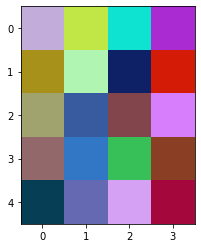

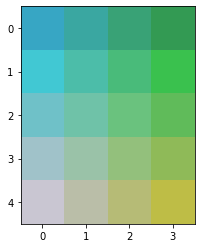

In [76]:
large_cycle_rgb(map1, training)

In [10]:
training, dim, number_rows_data = load_data(data)

In [75]:
map1 = MapClass(length, width, dim, move_closer_coef)

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3


In [12]:
map1.weights

tensor([[0.3543, 0.7847, 0.8889],
        [0.5940, 0.2325, 0.4770],
        [0.7237, 0.0283, 0.4073],
        [0.0054, 0.2215, 0.3075],
        [0.2222, 0.8868, 0.1244],
        [0.6512, 0.7680, 0.9492],
        [0.0770, 0.4221, 0.0907],
        [0.3984, 0.2448, 0.6500],
        [0.1701, 0.6000, 0.9125],
        [0.3331, 0.9530, 0.9551],
        [0.7124, 0.2667, 0.5892],
        [0.4007, 0.2099, 0.6594],
        [0.9480, 0.8455, 0.5366],
        [0.4913, 0.8400, 0.2370],
        [0.9501, 0.3873, 0.2671],
        [0.4502, 0.4446, 0.8146],
        [0.3527, 0.3224, 0.4923],
        [0.5868, 0.5228, 0.4135],
        [0.5620, 0.6977, 0.9404],
        [0.3427, 0.8928, 0.3835]])

In [13]:
map1.cycle(training)

In [14]:
map1.weights

tensor([[0.3565, 0.5762, 0.7609],
        [0.3874, 0.4481, 0.6713],
        [0.4078, 0.3836, 0.6065],
        [0.3357, 0.3023, 0.5338],
        [0.4868, 0.5412, 0.7058],
        [0.5210, 0.4695, 0.6804],
        [0.5246, 0.4090, 0.5944],
        [0.5163, 0.3599, 0.5467],
        [0.6505, 0.5384, 0.7324],
        [0.6834, 0.4715, 0.6597],
        [0.7148, 0.4166, 0.5778],
        [0.6796, 0.4149, 0.5088],
        [0.8002, 0.6010, 0.7368],
        [0.7992, 0.4895, 0.6183],
        [0.8554, 0.4302, 0.5272],
        [0.7912, 0.5139, 0.4331],
        [0.7582, 0.5554, 0.6738],
        [0.8102, 0.5246, 0.5678],
        [0.8337, 0.5529, 0.4577],
        [0.8184, 0.6835, 0.2890]])

In [15]:
map1.distance_matrix

tensor([[0.0000, 1.0000, 2.0000, 3.0000, 1.0000, 1.4142, 2.2361, 3.1623, 2.0000,
         2.2361, 2.8284, 3.6056, 3.0000, 3.1623, 3.6056, 4.2426, 4.0000, 4.1231,
         4.4721, 5.0000],
        [1.0000, 0.0000, 1.0000, 2.0000, 1.4142, 1.0000, 1.4142, 2.2361, 2.2361,
         2.0000, 2.2361, 2.8284, 3.1623, 3.0000, 3.1623, 3.6056, 4.1231, 4.0000,
         4.1231, 4.4721],
        [2.0000, 1.0000, 0.0000, 1.0000, 2.2361, 1.4142, 1.0000, 1.4142, 2.8284,
         2.2361, 2.0000, 2.2361, 3.6056, 3.1623, 3.0000, 3.1623, 4.4721, 4.1231,
         4.0000, 4.1231],
        [3.0000, 2.0000, 1.0000, 0.0000, 3.1623, 2.2361, 1.4142, 1.0000, 3.6056,
         2.8284, 2.2361, 2.0000, 4.2426, 3.6056, 3.1623, 3.0000, 5.0000, 4.4721,
         4.1231, 4.0000],
        [1.0000, 1.4142, 2.2361, 3.1623, 0.0000, 1.0000, 2.0000, 3.0000, 1.0000,
         1.4142, 2.2361, 3.1623, 2.0000, 2.2361, 2.8284, 3.6056, 3.0000, 3.1623,
         3.6056, 4.2426],
        [1.4142, 1.0000, 1.4142, 2.2361, 1.0000, 0.0000, 1.0

In [16]:
map1.impact_matrix

tensor([[1.0000, 0.6892, 0.4237, 0.2301, 0.6892, 0.5716, 0.3711, 0.2059, 0.4237,
         0.3711, 0.2579, 0.1492, 0.2301, 0.2059, 0.1492, 0.0897, 0.1096, 0.0991,
         0.0736, 0.0455],
        [0.6892, 1.0000, 0.6892, 0.4237, 0.5716, 0.6892, 0.5716, 0.3711, 0.3711,
         0.4237, 0.3711, 0.2579, 0.2059, 0.2301, 0.2059, 0.1492, 0.0991, 0.1096,
         0.0991, 0.0736],
        [0.4237, 0.6892, 1.0000, 0.6892, 0.3711, 0.5716, 0.6892, 0.5716, 0.2579,
         0.3711, 0.4237, 0.3711, 0.1492, 0.2059, 0.2301, 0.2059, 0.0736, 0.0991,
         0.1096, 0.0991],
        [0.2301, 0.4237, 0.6892, 1.0000, 0.2059, 0.3711, 0.5716, 0.6892, 0.1492,
         0.2579, 0.3711, 0.4237, 0.0897, 0.1492, 0.2059, 0.2301, 0.0455, 0.0736,
         0.0991, 0.1096],
        [0.6892, 0.5716, 0.3711, 0.2059, 1.0000, 0.6892, 0.4237, 0.2301, 0.6892,
         0.5716, 0.3711, 0.2059, 0.4237, 0.3711, 0.2579, 0.1492, 0.2301, 0.2059,
         0.1492, 0.0897],
        [0.5716, 0.6892, 0.5716, 0.3711, 0.6892, 1.0000, 0.6